# Self-Organising Maps

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines
from sklearn.metrics.pairwise import euclidean_distances

# reading data
data = pd.read_csv("cash-crops-nepal.csv")
# visualize some data
data.iloc[:10,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641
5,1989/90,2046/47,OILSEED,153660,98060,638
6,1990/91,2047/48,OILSEED,156310,92140,589
7,1991/92,2048/49,OILSEED,154570,87840,568
8,1992/93,2049/50,OILSEED,165240,93690,567
9,1993/94,2050/51,OILSEED,177486,107535,606


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


We will not use "Crop" labels for training SOM. But we will use it to check if the clustering by SOM worked fine or not. We will also drop the “Year AD” and “Year BS” columns.

In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:10,:]

,Area,Production,Yield
59,3813,3763,987
65,24910,616580,24752
51,6742,6223,923
18,186720,124931,669
60,3597,3460,962
73,43583,1469214,33711
100,11289,16392,1452
7,154570,87840,568
48,7290,6980,957
77,53894,1971646,36584


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

,Area,Production,Yield
59,0.020023,0.001584,0.024542
65,0.130810,0.259492,0.615461
51,0.035404,0.002619,0.022950
18,0.980523,0.052578,0.016635
60,0.018889,0.001456,0.023920
73,0.228867,0.618329,0.838228
100,0.059282,0.006899,0.036104
7,0.811694,0.036968,0.014123
48,0.038282,0.002938,0.023796
77,0.283014,0.829781,0.909665


## Perfomance metrics
Implementation of Quantization Error and Neighbourhood Trustworthiness functions. 
Credits go to the authours of the following Github repository  https://github.com/FlorentF9/SOMperf

In [6]:
def neighborhood_trustworthiness(k, som, x, d=None):
    n = x.shape[0]  # data size
    assert k < (n / 2), 'Number of neighbors k must be < N/2 (where N is the number of data samples).'
    if d is None:
        d = euclidean_distances(x, som)
    d_data = euclidean_distances(x) + np.diag(np.inf * np.ones(n))
    projections = som[np.argmin(d, axis=1)]
    d_projections = euclidean_distances(projections) + np.diag(np.inf * np.ones(n))
    original_ranks = pd.DataFrame(d_data).rank(method='min', axis=1)
    projected_ranks = pd.DataFrame(d_projections).rank(method='min', axis=1)
    weights = (projected_ranks <= k).sum(axis=1) / (original_ranks <= k).sum(axis=1)  # weight k-NN ties
    nps = np.zeros(n)
    trs = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if (i != j) and (original_ranks.iloc[i, j] <= k) and (projected_ranks.iloc[i, j] > k):
                nps[i] += (projected_ranks.iloc[i, j] - k) * weights[i]
            elif (i != j) and (original_ranks.iloc[i, j] > k) and (projected_ranks.iloc[i, j] <= k):
                trs[i] += (original_ranks.iloc[i, j] - k) / weights[i]
    tr = 1.0 - 2.0 / (n * k * (2*n - 3*k - 1)) * np.sum(trs)
    return tr

In [7]:
def quantization_error(som=None, x=None, d=None):
    if d is None:
        if som is None or x is None:
            raise ValueError('If distance matrix d is not given, som and x cannot be None!')
        else:
            d = euclidean_distances(x, som)
    qes = np.min(d, axis=1)
    return np.mean(qes)

## Training SOM

Now let’s train the data in a 3 x 3 SOM network using 3 input features. 

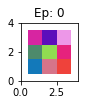

In [8]:
from our_som1 import *

# som = SOM(x_size, y_size, num_features)
agri_som = SOM(3,3,3)
agri_som_2 = SOM1A(3,3,3)
agri_som_3 = SOM1B(3,3,3)

# Initial weights
init_fig = plt.figure()
# original SOM
agri_som.show_plot(init_fig, 1, 0)

plt.show()

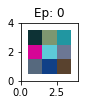

In [9]:
# SOM1A
init_fig = plt.figure()
agri_som_2.show_plot(init_fig, 1, 0)
plt.show()

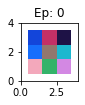

In [10]:
# SOM1B
init_fig = plt.figure()
agri_som_3.show_plot(init_fig, 1, 0)
plt.show()

Random weights (3 features) are given to each of 9 (3×3) neurons. The above figure shows how the neural network looks like in the beginning.

## Train our SOMs

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighbo

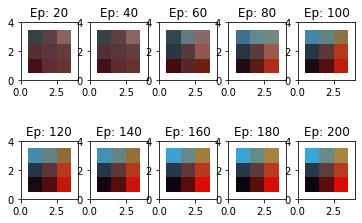

In [11]:
agri_som.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009000000000000001
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.006999999999999999
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.005
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.004
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.0030000000000000005
-------------------------------------
SOM training epoches 160
neighborhood radius  1.2457309396155174
learning rate  0.001999999

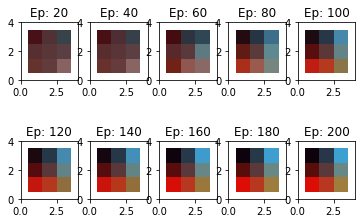

In [12]:
agri_som_2.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

SOM training epoches 20
neighborhood radius  0.15000000000000002
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  0.07500000000000001
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  0.05
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  0.037500000000000006
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  0.03
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  0.025
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  0.02142857142857143
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighborhood radius  0.018750000000000003


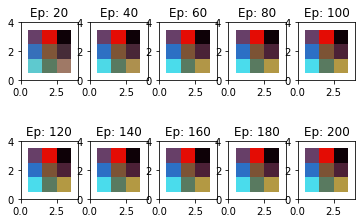

In [13]:
agri_som_3.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

Notice: 

- after 60 Epochs, the network changed from random colors (initialization) to nearly constant color; this means that initial neighbourhood is large, so each neuron’s weight are being adjusted according to data.

- Slowly, the network develops different color according to input data structures/patterns, but, you can notice similar colors are neighbors to one another.

- Since there was a random initialization, the positions of colors may change but the topology will be preserved.

## Prediction and Analysis

In [14]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df

clustered_df = trunc_data.apply(predict, axis=1)
#clustered_df.iloc[0:10]

In [15]:
def predict_2(df):
    bmu, bmu_idx = agri_som_2.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df_2 = trunc_data.apply(predict_2, axis=1)
#clustered_df_2.iloc[0:10]

In [16]:
def predict_3(df):
    bmu, bmu_idx = agri_som_3.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df_3 = trunc_data.apply(predict_3, axis=1)
#clustered_df_3.iloc[0:10]

In [17]:
def transform_df(df):
    b = pd.DataFrame(df['bmu'].apply(lambda x: x[0].tolist()), index=trunc_data.index)
    b = b.bmu.apply(list).apply(pd.Series).astype(float)
    #b = b['bmu'].apply(list)
    #b = b.apply(pd.Series).astype(float)
    return b

### Measure perfomance

In [18]:
som_original = transform_df(clustered_df)
som1a = transform_df(clustered_df_2)
som1b = transform_df(clustered_df_3)

In [19]:
#neighborhood_trustworthiness(1, trunc_data, som_original)
quantization_error(trunc_data, som_original)

0.03210957144105932

In [20]:
#neighborhood_trustworthiness(1, trunc_data, som1a)
quantization_error(trunc_data, som1a)

0.030790209695549305

In [21]:
#neighborhood_trustworthiness(1, trunc_data, som1a)
quantization_error(trunc_data, som1b)

0.019098918475998945

Now, joininig the labelled initial data

In [22]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df_2 = agri_data.join(clustered_df_2, rsuffix="_norm")
joined_df_3 = agri_data.join(clustered_df_3, rsuffix="_norm")
#joined_df[0:10]

### Visualize how the original data gets clustered in the original SOM

In [23]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

def plot_som(som, joined_df):
    fig = plt.figure()
    # setup axes
    ax = fig.add_subplot(111)
    scale = 50
    ax.set_xlim((0, som.net.shape[0]*scale))
    ax.set_ylim((0, som.net.shape[1]*scale))
    ax.set_title("Cash Crops Clustering by using SOM")

    for x in range(0, som.net.shape[0]):
        for y in range(0, som.net.shape[1]):
            ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                        facecolor='white',
                        edgecolor='grey'))
    legend_map = {}
            
    for index, row in joined_df.iterrows():
        x_cor = row['bmu_idx'][0] * scale
        y_cor = row['bmu_idx'][1] * scale
        x_cor = np.random.randint(x_cor, x_cor + scale)
        y_cor = np.random.randint(y_cor, y_cor + scale)
        color = row['bmu'][0]
        marker = "$\\ " + row['Crop'][0]+"$"
        marker = marker.lower()
        ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
        label = row['Crop']
        if not label in legend_map:
            legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                            markersize=10, label=label)
    plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
    plt.show()

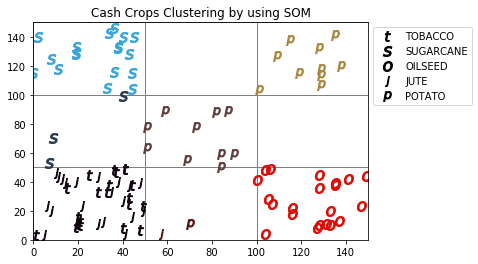

In [24]:
plot_som(agri_som, joined_df)

### Visualize how the original data gets clustered in the SOM1A

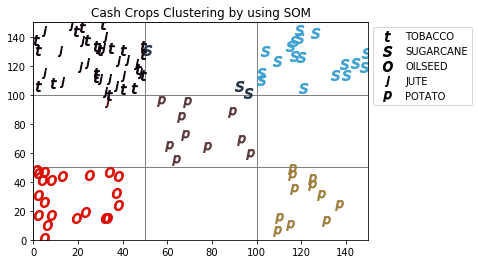

In [25]:
plot_som(agri_som_2, joined_df_2)

### Visualize how the original data gets clustered in the SOM1B

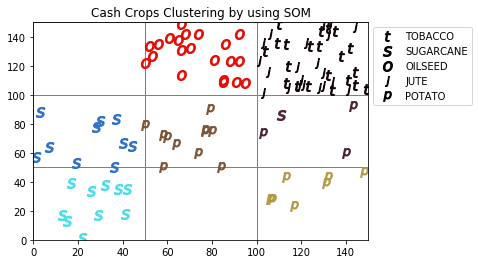

In [26]:
plot_som(agri_som_3, joined_df_3)

# Resposta às questões

## Q1
Visto que o SOM realiza simultaneamente uma projeção dos dados numa dimensão menor e um aglomeramento (clustering) de pontos nessa mesma dimensão seria necessário recorrer a duas métricas distintas para avaliar melhorias na performance. 

A primeira é o Quantization Error, visto ser uma boa métrica para medir o erro associado à projeção dos dados feita pelo SOM. Um menor erro de quantização significaria que existiu um aumento na perfomance do SOM. 

A segunda métrica é o Neighbourhood Trustworthiness, que representa uma medição da preservação de vizinhança na projeção criada pelo SOM, isto é, verifica se os K vizinhos mais próximos de um ponto na dimensão superior foram preservados aquando da projeção para uma dimensão menor. Um maior valor desta métrica indica uma melhor performance do SOM.

Estas métricas encontram-se explicadas em maior detalhe no seguinte
artigo: https://arxiv.org/pdf/2011.05847.pdf .

## Q2
Após a alteração da curva de interpolação do learning rate para uma função do tipo Inverso of Time, o learning rate passou a decair muito mais rapidamente. A nível de métricas, o erro de quantização diminiu, o que representa uma melhoria na performance. No entanto, a separação dos clusters durante o treino demorou mais epócas até se tornar perceptível.

## Q3
Após a alteração da curva do desvio padrão para uma função linear, o neighbourhood radius passou a decair muito mais rapidamente e para valores menores. A nível de métricas, o erro de quantização diminiu, o que representa uma melhoria na performance. No entanto, os clusters representados na figura "Cash Crops Clustering by using SOM" são menos compactos.

## Q7
O método de Runge-Kutta é um método iterativo de resolução numérica, isto é, aproximação, de soluções de equações diferenciais ordinárias. Como tal, este método poderá ser útil para acelerar a resolução da Equação (3). Ao acelerar-mos a resolução da Eq. (3), esperamos que a mesma convirja mais rapidamente, necessitando assim de menos épocas para encontrar os padrões subjacentes aos dados. Esta acelaração também deverá fazer com que o learning rate decaia mais rapidamente

## Q9
Tendo em conta as alíneas anteriores e com vista a aumentar a performance do SOM implementaria as seguintes alterações:
- Alterar o learning rate para a função implementada no SOM1A
- Implementaria o método de Runge-Kutta de modo a que a equação convergisse mais depressa